## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from IPython.display import Image
from six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus

In [14]:
#decision tree
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.25, random_state=4)
clf = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=5,min_samples_leaf=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [15]:
acc = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: ', acc)
print(iris.feature_names)
print("Feature importance: ", clf.feature_importances_)

Accuracy:  0.9736842105263158
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature importance:  [0.         0.         0.54302272 0.45697728]


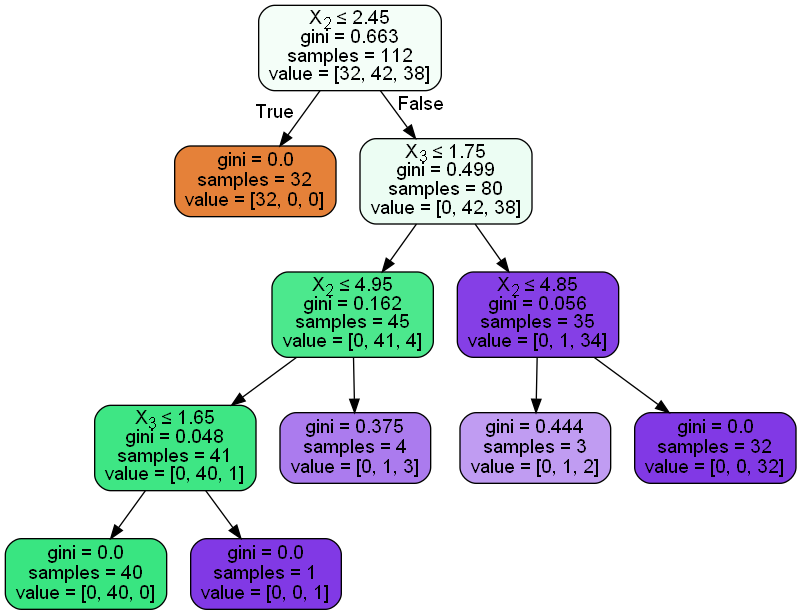

In [22]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,filled=True,
                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [34]:
#logistic Regression
loregr = linear_model.LogisticRegression()
loregr.fit(x_train,y_train)
y_pred = loregr.predict(x_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.9736842105263158


In [44]:
#linear decision regression
wine = datasets.load_wine()
x_train, x_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size = 0.25, random_state=4)
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

mean square error:  0.044444444444444446


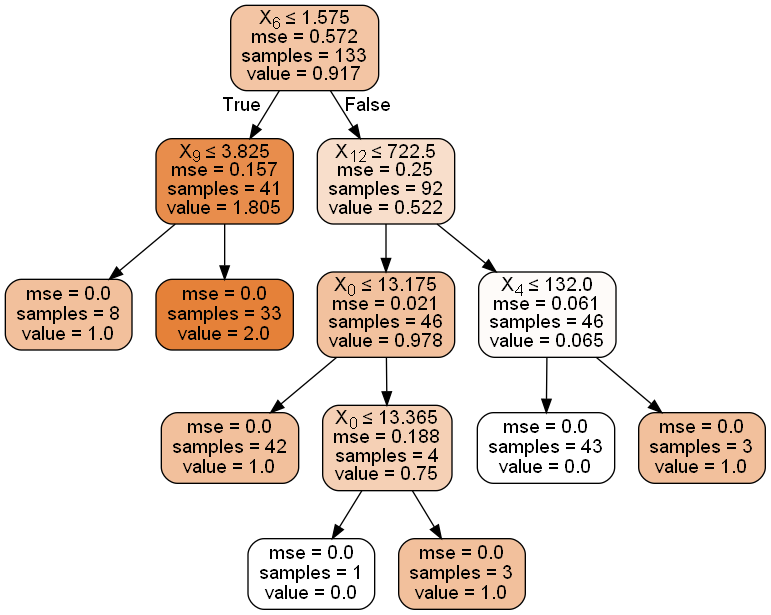

In [48]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("mean square error: ",mse)
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,filled=True,
                rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [51]:
#regression
rege = linear_model.LinearRegression()
rege.fit(x_train,y_train)
y_pred = rege.predict(x_test)

In [52]:
mse = metrics.mean_squared_error(y_test, y_pred)
print("mse: ", mse)

mse:  0.06512390290821851
